<a href="https://colab.research.google.com/github/syildirim0/machine_learning/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [39]:
df=pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/3.karar_agaclari/ml_3b_siniflandirma/data/adult.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
              'native-country', 'salary']

In [41]:



X = df.drop(['salary'], axis=1)
y = df['salary']
print('Salary Distribution:')
print(y.value_counts())
y = np.where(df['salary'] == ' <=50K',0,1)

Salary Distribution:
 <=50K    24720
 >50K      7841
Name: salary, dtype: int64


In [42]:

df['capital-gain'] = df['capital-gain'].astype(float)
X.select_dtypes(include='object').tail(20)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32541,?,HS-grad,Separated,?,Not-in-family,Black,Female,United-States
32542,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States
32543,Local-gov,Assoc-acdm,Divorced,Prof-specialty,Unmarried,White,Female,United-States
32544,Private,Masters,Divorced,Other-service,Not-in-family,Other,Female,United-States
32545,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
32546,Private,Assoc-acdm,Divorced,Tech-support,Not-in-family,White,Female,United-States
32547,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico
32548,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
32549,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,United-States
32550,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


In [43]:

categorical_columns= [c for c in X.columns if X[c].dtype.name == 'object']
for c in categorical_columns:
  X[c] = np.where(X[c] == ' ?', X[c].mode(), df[c])
X.select_dtypes(include='object').tail(20)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32541,Private,HS-grad,Separated,Prof-specialty,Not-in-family,Black,Female,United-States
32542,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
32543,Local-gov,Assoc-acdm,Divorced,Prof-specialty,Unmarried,White,Female,United-States
32544,Private,Masters,Divorced,Other-service,Not-in-family,Other,Female,United-States
32545,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
32546,Private,Assoc-acdm,Divorced,Tech-support,Not-in-family,White,Female,United-States
32547,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico
32548,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
32549,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,United-States
32550,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


In [44]:
X = pd.concat([X, pd.get_dummies(X.select_dtypes(include='object'))], axis=1)
X = X.drop(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'], axis=1)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=42)
tree1= DecisionTreeClassifier(max_depth= 2, random_state=42)
tree1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

<function matplotlib.pyplot.show>

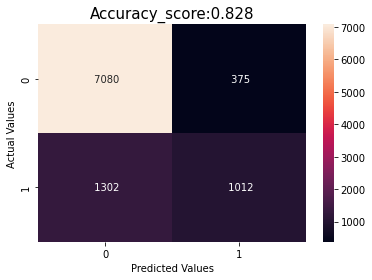

In [47]:
predictions= tree1.predict(X_test)
score= round(accuracy_score(y_test,predictions),3)
cm = cm(y_test,predictions)
sns.heatmap(cm, annot=True, fmt=' .0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy_score:{}' .format(score), size=15)
plt.show

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions, target_names=[' <=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      7455
        >50K       0.73      0.44      0.55      2314

    accuracy                           0.83      9769
   macro avg       0.79      0.69      0.72      9769
weighted avg       0.82      0.83      0.81      9769



In [59]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

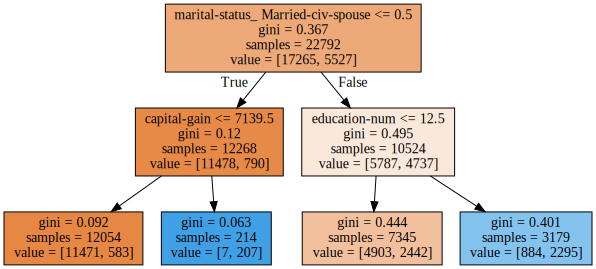

In [60]:
graph = Source(tree.export_graphviz(tree1, out_file=None,feature_names=X.columns, 
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

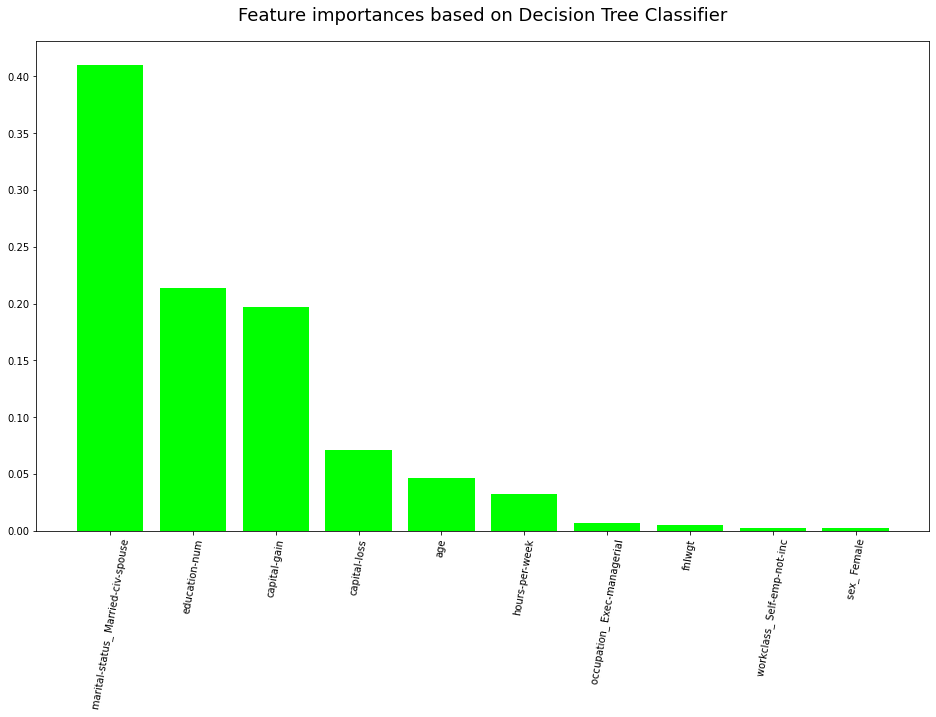

In [64]:
plt.figure(figsize= (16,9))
from sklearn import ensemble
tree2=DecisionTreeClassifier(max_depth= 8, random_state=42)
tree2.fit(X_train,y_train)
ranking=tree2.feature_importances_
features=np.argsort(ranking)[::-1][:10]
columns=X.columns

plt.title("Feature importances based on Decision Tree Classifier", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

# New section